In [1]:
import sys
sys.path.append('/mnt/c/Users/Prasa/OneDrive/dfenn-main')

import tensorflow as tf
from tensorflow import keras
from keras import *
from keras.models import Sequential
import keras_tuner as kt
import pickle
from modules.train_cnn import *
from modules.process_data import *
from modules.validate import *
import os

os.environ[
    "TF_CPP_MIN_LOG_LEVEL"
] = "3"  # this is to silence some of TF warning messages
import typer
from typing_extensions import Annotated


2024-01-27 15:13:20.364446: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-27 15:13:20.418908: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-27 15:13:20.420325: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-27 15:13:21.576919: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
def scramble(
    data_in_path: str,
    data_out_path: str,
    scramble_row: Annotated[bool, typer.Option()] = True,
    free_scramble: Annotated[bool, typer.Option()] = False,
    seed: Annotated[int, typer.Option()] = None,
):
    # read in data
    data_in = pickle.load(open(f"{data_in_path}", "rb"))

    # scramble data and store in a new variable
    scramble_data = []
    # iterate through the data array and alter each tensor
    for tensor in data_in:
        scramble_tensor = scramble_snp_tensor(
            tensor, scramble_row=scramble_row, free_scramble=free_scramble, seed=seed
        )
        scramble_data.append(scramble_tensor)

    # save output scrambled data as a numpy array
    pickle.dump(np.array(scramble_data), open(f"{data_out_path}", "wb"))

In [4]:
test_dprime_varied_tensors = np.array(pickle.load(open('../processed_LD_data/dprime_vary_data/test_data_1B08_varied_scale_2_Dprime_labeled_tensors', "rb")))
test_dprime_varied_labels = np.array(pickle.load(open('../processed_LD_data/dprime_vary_data/test_data_1B08_varied_scale_2_Dprime_labeled_labels', 'rb')))


train_dprime_varied_tensors = np.array(pickle.load(open('../processed_LD_data/dprime_vary_data/train_data_1B08_varied_scale_2_Dprime_labeled_tensors', 'rb')))
train_dprime_varied_labels = np.array(pickle.load(open('../processed_LD_data/dprime_vary_data/train_data_1B08_varied_scale_2_Dprime_labeled_labels', 'rb')))

test_dprime_vary_scrambled_tensors = np.array(pickle.load(open('../processed_LD_data/dprime_vary_data/test_Dprime_varied_scrambled_tensors', 'rb')))
test_dprime_vary_free_scramble_tensors = np.array(pickle.load(open('../processed_LD_data/dprime_vary_data/test_Dprime_varied_free_scrambled_tensors', 'rb')))

In [5]:
scramble('../processed_LD_data/test_data_1B08_varied_scale_2_Dprime_labeled_tensors', '../processed_LD_data/test_Dprime_varied_scrambled_tensors')

In [3]:
scramble('../processed_LD_data/dprime_vary_data/test_data_1B08_varied_scale_2_Dprime_labeled_tensors', '../processed_LD_data/dprime_vary_data/test_Dprime_varied_free_scrambled_tensors', free_scramble=True)

In [7]:
test_dprime_vary_scrambled_tensors = np.array(pickle.load(open('../processed_LD_data/dprime_vary_data/test_Dprime_varied_scrambled_tensors', 'rb')))

Epoch 1/30


2024-01-17 20:25:23.696451: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 145680000 exceeds 10% of free system memory.


95/95 [==============================] - 13s 123ms/step - loss: 0.0131 - mean_squared_error: 0.0131
Epoch 2/30
95/95 [==============================] - 12s 123ms/step - loss: 0.0106 - mean_squared_error: 0.0106
Epoch 3/30
95/95 [==============================] - 12s 124ms/step - loss: 0.0106 - mean_squared_error: 0.0106
Epoch 4/30
95/95 [==============================] - 11s 121ms/step - loss: 0.0106 - mean_squared_error: 0.0106
Epoch 5/30
95/95 [==============================] - 13s 132ms/step - loss: 0.0106 - mean_squared_error: 0.0106
Epoch 6/30
95/95 [==============================] - 13s 140ms/step - loss: 0.0106 - mean_squared_error: 0.0106
Epoch 7/30
95/95 [==============================] - 13s 133ms/step - loss: 0.0105 - mean_squared_error: 0.0105
Epoch 8/30
95/95 [==============================] - 13s 132ms/step - loss: 0.0104 - mean_squared_error: 0.0104
Epoch 9/30
95/95 [==============================] - 15s 155ms/step - loss: 0.0105 - mean_squared_error: 0.0105
Epoch 10/30


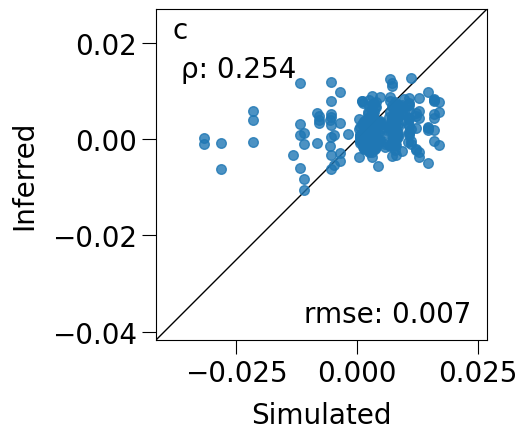

In [5]:
# THIS IS THE MODEL THAT LINH PROVIDED, CHECK HERE TO SEE IF YOUR CHANGES WORKED OR NOT

def create_dfe_cnn_linh(input_shape: tuple, n_outputs: int):
    model = Sequential()
    model.add(
        layers.Conv1D(
            filters=64,
            kernel_size=5,
            strides=2,
            input_shape=input_shape,
            activation="relu",
        )
    )
    # model.add(layers.Dropout(0.2))
    model.add(layers.Conv1D(filters=32, kernel_size=3, activation="relu"))
    model.add(layers.Conv1D(filters=16, kernel_size=2, strides=2, activation="relu"))
    model.add(layers.AveragePooling2D(pool_size=(20, 1)))
    model.add(layers.AveragePooling2D(pool_size=(1, 4)))
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dense(n_outputs))
    model.compile(optimizer="adam", loss="mse", metrics=["mean_squared_error"])

    return model, {}

Linh_architecture, kwargs = create_dfe_cnn_linh(train_dprime_varied_tensors.shape[1:], 3) 

kwargs.update(
    x=train_dprime_varied_tensors,
    y=train_dprime_varied_labels,
    epochs=30,
)

callback = callbacks.EarlyStopping(monitor="val_loss", patience=5)
Linh_architecture.fit(**kwargs, callbacks=[callback])

plot_LD_results(Linh_architecture, test_dprime_varied_tensors, test_dprime_varied_labels, "../All_my_plots_not_in_my_jupyter_notebooks/dprime_varying_scale_orginal_Linh_model_1_17_24")

In [5]:
# THIS IS THE MODEL THAT LINH PROVIDED, CHECK HERE TO SEE IF YOUR CHANGES WORKED OR NOT

def create_dfe_cnn_linh(input_shape: tuple, n_outputs: int):
    model = Sequential()
    model.add(
        layers.Conv1D(
            filters=64,
            kernel_size=5,
            strides=2,
            input_shape=input_shape,
            activation="relu",
        )
    )
    # model.add(layers.Dropout(0.2))
    model.add(layers.Conv1D(filters=32, kernel_size=3, activation="relu"))
    model.add(layers.Conv1D(filters=16, kernel_size=2, strides=2, activation="relu"))
    model.add(layers.AveragePooling2D(pool_size=(20, 1)))
    model.add(layers.AveragePooling2D(pool_size=(1, 4)))
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dense(n_outputs))
    model.compile(optimizer="adam", loss="mse", metrics=["mean_squared_error"])

    return model, {}

Linh_architecture, kwargs = create_dfe_cnn_linh(train_dprime_varied_tensors.shape[1:], 3) 

kwargs.update(
    x=train_dprime_varied_tensors,
    y=train_dprime_varied_labels,
    epochs=30,
)

callback = callbacks.EarlyStopping(monitor="val_loss", patience=5)
Linh_architecture.fit(**kwargs, callbacks=[callback])

Linh_architecture.save("../All_my_models/Dprime_vary_Linh_org_model_1_27_24")

Epoch 1/30
95/95 [==============================] - 12s 119ms/step - loss: 0.0119 - mean_squared_error: 0.0119
Epoch 2/30
95/95 [==============================] - 11s 117ms/step - loss: 0.0108 - mean_squared_error: 0.0108
Epoch 3/30
95/95 [==============================] - 11s 113ms/step - loss: 0.0106 - mean_squared_error: 0.0106
Epoch 4/30
95/95 [==============================] - 10s 110ms/step - loss: 0.0106 - mean_squared_error: 0.0106
Epoch 5/30
95/95 [==============================] - 10s 108ms/step - loss: 0.0106 - mean_squared_error: 0.0106
Epoch 6/30
95/95 [==============================] - 10s 108ms/step - loss: 0.0105 - mean_squared_error: 0.0105
Epoch 7/30
95/95 [==============================] - 10s 108ms/step - loss: 0.0106 - mean_squared_error: 0.0106
Epoch 8/30
95/95 [==============================] - 10s 108ms/step - loss: 0.0106 - mean_squared_error: 0.0106
Epoch 9/30
95/95 [==============================] - 10s 110ms/step - loss: 0.0106 - mean_squared_error: 0.0106
E

2024-01-27 15:55:52.554759: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'conv1d_input' with dtype float and shape [?,20,300,2]
	 [[{{node conv1d_input}}]]
2024-01-27 15:55:52.626308: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'conv1d_input' with dtype float and shape [?,20,300,2]
	 [[{{node conv1d_input}}]]
2024-01-27 15:55:52.646618: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,20,300,2]

INFO:tensorflow:Assets written to: ../All_my_models/Dprime_vary_Linh_org_model_1_27_24/assets


INFO:tensorflow:Assets written to: ../All_my_models/Dprime_vary_Linh_org_model_1_27_24/assets


10/10 [==============================] - 1s 42ms/step


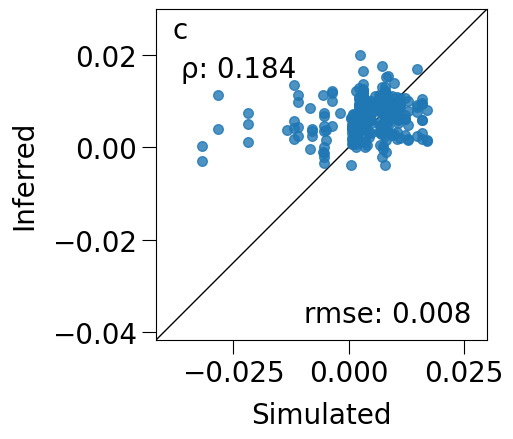

In [6]:
plot_LD_results(Linh_architecture, test_dprime_vary_scrambled_tensors, test_dprime_varied_labels, "../All_plots_I_plan_to_use_for_final/Dprime_varied_Linh_org_graphs_for_test_scrambled_tensors")

10/10 [==============================] - 0s 36ms/step


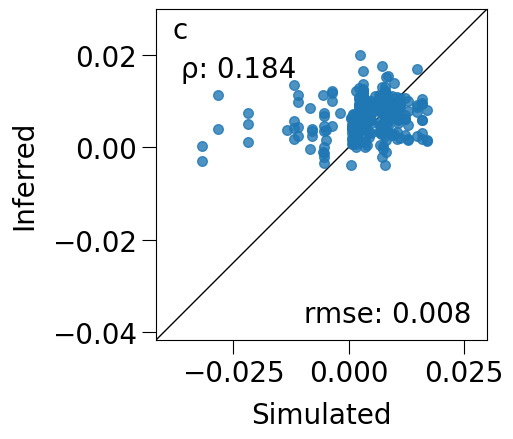

In [7]:
plot_LD_results(Linh_architecture, test_dprime_vary_scrambled_tensors, test_dprime_varied_labels, "../All_plots_I_plan_to_use_for_final/Dprime_varied_Linh_org_graphs_for_test_free_scrambled_tensors")

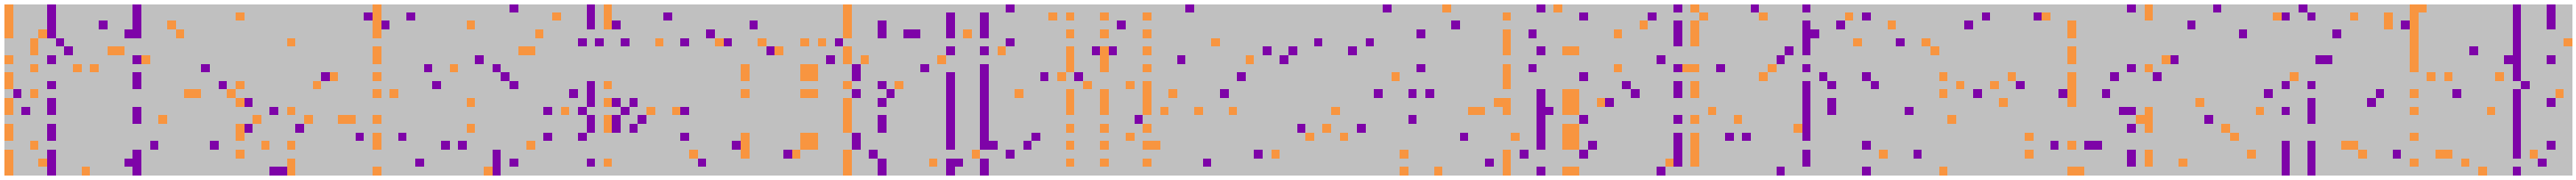

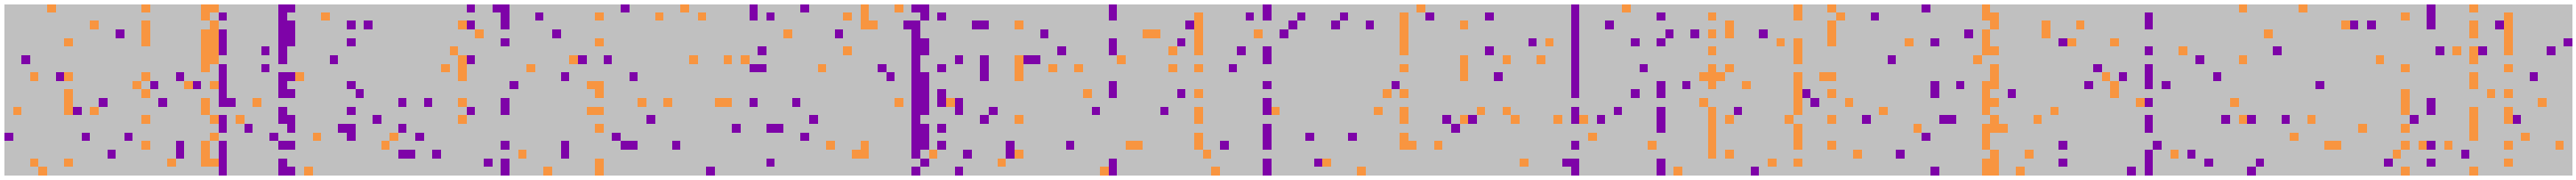

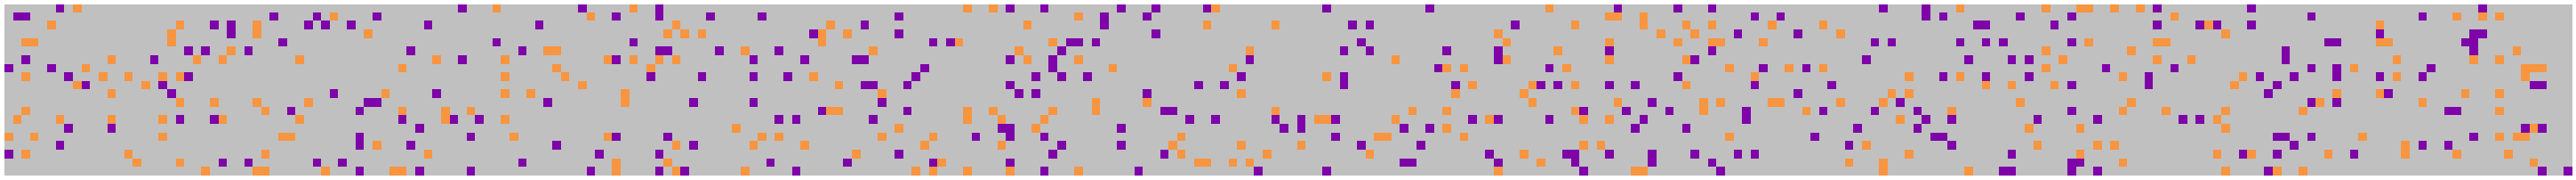

In [8]:
visualize_snp_tensor(test_dprime_varied_tensors[0])
visualize_snp_tensor(test_dprime_vary_scrambled_tensors[0])
visualize_snp_tensor(test_dprime_vary_free_scramble_tensors[0])